In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
np.random.seed(123)
#################

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


<h2>Pre-process the dataset</h2>
<ul>
    <li>Get the data</li>
    <li>Rename the Columns</li>
    <li>Drop null values</li>
    <li>Remove target variable</li>
    <li>Get Dummies variable</li>
    <li>Reorder the Dataframe</li>
</ul>

In [2]:
df = pd.read_csv('data/house-votes-84.csv', header=None)
columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.columns = columns
df[df == '?'] = np.nan
df = df.dropna()
df = df.reset_index(drop=True)
y = df['party']
df = df.drop('party', axis=1)

df_d = pd.get_dummies(df, drop_first=True)
df_d['party'] = y
cols = df_d.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_d = df_d[cols]
df_d.columns = columns

In [3]:
df_d.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
4,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


<b>Visual EDA</b>

The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the scatter_matrix() function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

Given on the right is a countplot of the 'education' bill, generated from the following code:

<i>plt.figure()<br>
sns.countplot(x='education', hue='party', data=df, palette='RdBu')<br>
plt.xticks([0,1], ['No', 'Yes'])<br>
plt.show()<br></i>

In sns.countplot(), we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, 

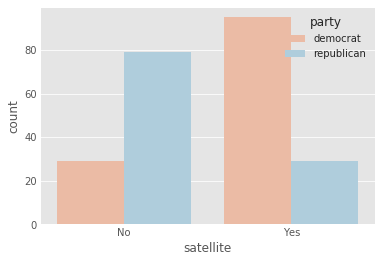

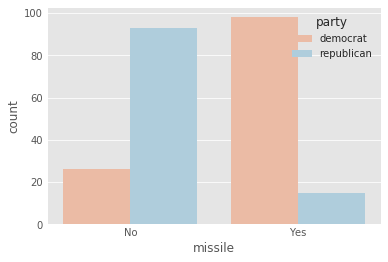

In [4]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df_d, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

plt.figure()
sns.countplot(x='missile', hue='party', data=df_d, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

<b>k-Nearest Neighbors: Fit</b>

Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.

In [5]:
# Import KNeighborsClassifier from sklearn.neighbors
#from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df_d['party'].values
X = df_d.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

<b>k-Nearest Neighbors: Predict</b>

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [6]:
X_new = np.random.rand(10, 16)

# Create arrays for the features and the response variable
y = df_d['party'].values
X = df_d.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat']


<b>The digits recognition dataset</b>

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

dict_keys(['data', 'DESCR', 'target', 'target_names', 'images'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

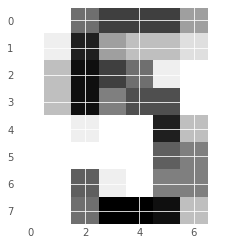

In [7]:
# Import necessary modules
#from sklearn import datasets
#import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

<b>Train/Test Split + Fit/Predict/Accuracy</b>

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [8]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Excellent work! Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

<b>Overfitting and underfitting</b>

Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

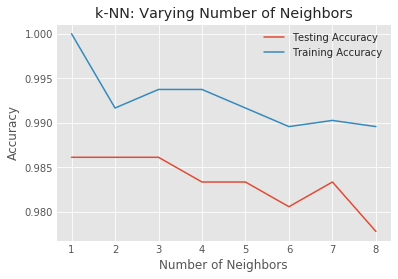

In [9]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Great work! It looks like the test accuracy is highest when using 3 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.